In [1]:

import os

import numpy as np
from keras.layers import Conv2D, UpSampling2D, InputLayer
from keras.models import Sequential
from keras.utils import img_to_array, load_img
from matplotlib import pyplot
from skimage.color import rgb2gray, rgb2lab, lab2rgb
from skimage.io import imsave

In [2]:
import os
def file_count():
    path ="data/Train"
    count = 0
    for file in os.listdir(path): #file 表示的是文件名
        if file.__contains__(".png") or file.__contains__(".jpg"):
            count = count+1
    return count

In [3]:
h = 272
w = 184
oh = h
ow = w

In [4]:
from skimage.transform import resize
def get_trains():
    path = "data/Train"  # 文件夹目录
    files = os.listdir(path)  # 得到文件夹下的所有文件名称
    xx = np.empty((file_count(), w, h, 1))
    yy = np.empty((file_count(), w, h, 2))
    i = 0
    for file in files:  # 遍历文件夹
        if not os.path.isdir(file):  # 判断是否是文件夹，不是文件夹才打开
            # img
            print(path + "/" + file)  # 打印结果
            image = img_to_array(load_img(path + "/" + file))
            dst_size = (w, h)
            image = resize(image, dst_size)
            image_shape = image.shape
            x = rgb2lab(1.0 / 255 * image)[:, :, 0]
            y = rgb2lab(1.0 / 255 * image)[:, :, 1:]
            y /= 128
            x = x.reshape(image_shape[0], image_shape[1], 1)
            y = y.reshape(image_shape[0], image_shape[1], 2)
            xx[i] = x
            yy[i] = y
            i += 1
    return xx, yy

def get_trains_origin():
    path = "data/Train"  # 文件夹目录
    files = os.listdir(path)  # 得到文件夹下的所有文件名称
    xx = np.empty((file_count(), ow, oh, 1))
    yy = np.empty((file_count(), ow, oh, 2))
    i = 0
    for file in files:  # 遍历文件夹
        if not os.path.isdir(file):  # 判断是否是文件夹，不是文件夹才打开
            # img
            print(path + "/" + file)  # 打印结果
            image = img_to_array(load_img(path + "/" + file))
            dst_size = (ow, oh)
            image = resize(image, dst_size)
            image_shape = image.shape
            x = rgb2lab(1.0 / 255 * image)[:, :, 0]
            y = rgb2lab(1.0 / 255 * image)[:, :, 1:]
            y /= 128
            x = x.reshape(image_shape[0], image_shape[1], 1)
            y = y.reshape(image_shape[0], image_shape[1], 2)
            xx[i] = x
            yy[i] = y
            i += 1
    return xx, yy

In [5]:
def build_model(hh,ww):
    model = Sequential()
    model.add(InputLayer(input_shape=(ww, hh, 1)))
    model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
    model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
    model.compile(optimizer='rmsprop', loss='mse')
    return model

In [6]:
def colorize():
    x, y = get_trains_origin()
    model = build_model(oh,ow)
    model.load_weights('simple_model.h5')
    output = model.predict(x)
    print(output.shape, x.shape, y.shape)
    output *= 128
    for i in range(file_count()) :
        tmp = np.zeros((ow, oh, 3))
        tmp[:, :, 0] = x[i, :, :, 0]
        tmp[:, :, 1:] = output[i,:, :, :]
        imsave("test_image_result.png", lab2rgb(tmp))
        imsave("test_image_gray.png", rgb2gray(lab2rgb(tmp)))
        pyplot.imshow(lab2rgb(tmp))
        pyplot.show()

In [7]:
from keras.utils import plot_model
def draw_model():
    return plot_model(build_model(oh,ow), "my_first_model.png",show_shapes=True)

In [8]:
def train():
    xx, yy = get_trains()
    model0 = build_model(h,w)
    num_epochs = 6000
    batch_size = 6
    model_file = 'simple_model.h5'
    model0.load_weights(model_file)
    print(xx.shape,yy.shape)
    print(h,w)
    model0.fit(xx, yy, batch_size=file_count(), epochs=1000)
    model0.save(model_file)

data/Train/img.png
data/Train/img_1.png
data/Train/img_10.png
data/Train/img_11.png
data/Train/img_12.png
data/Train/img_13.png
data/Train/img_14.png
data/Train/img_15.png
data/Train/img_16.png
data/Train/img_17.png
data/Train/img_18.png
data/Train/img_19.png
data/Train/img_2.png
data/Train/img_20.png
data/Train/img_21.png
data/Train/img_22.png
data/Train/img_23.png
data/Train/img_24.png
data/Train/img_3.png
data/Train/img_4.png
data/Train/img_5.png
data/Train/img_6.png
data/Train/img_7.png
data/Train/img_8.png
data/Train/img_9.png
(25, 184, 272, 1) (25, 184, 272, 2)
272 184
Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 0.0017
Epoch 2/1000
1/1 [==============================] - 0s 136ms/step - loss: 0.0168
Epoch 3/1000
1/1 [==============================] - 0s 135ms/step - loss: 0.0050
Epoch 4/1000
1/1 [==============================] - 0s 135ms/step - loss: 0.0027
Epoch 5/1000
1/1 [==============================] - 0s 134ms/step - loss: 0.0018
Epoch 6/1000
1/1

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(25, 184, 272, 2) (25, 184, 272, 1) (25, 184, 272, 2)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


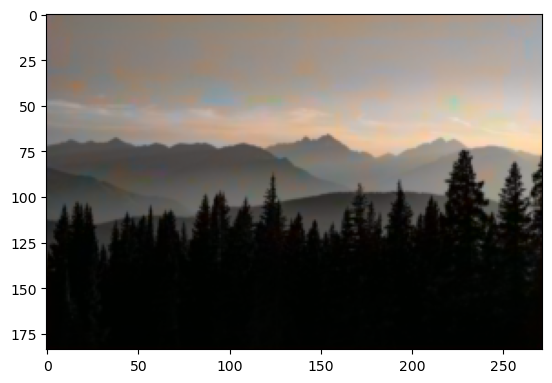

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


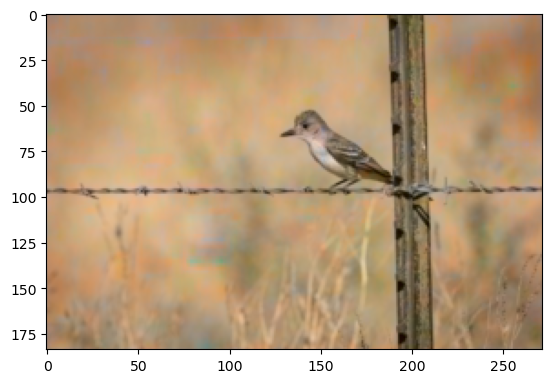

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


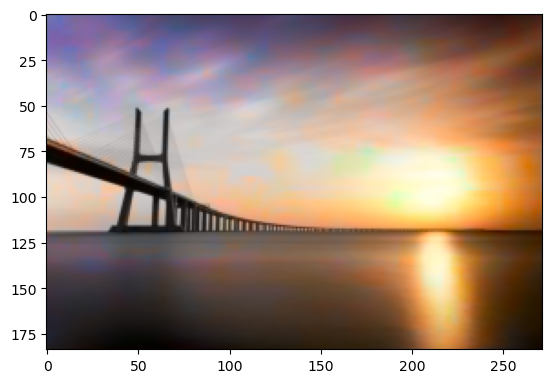

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


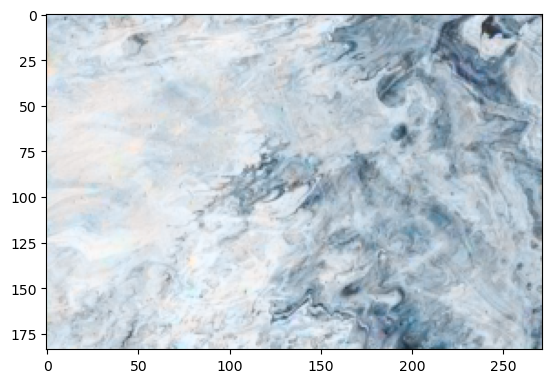

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


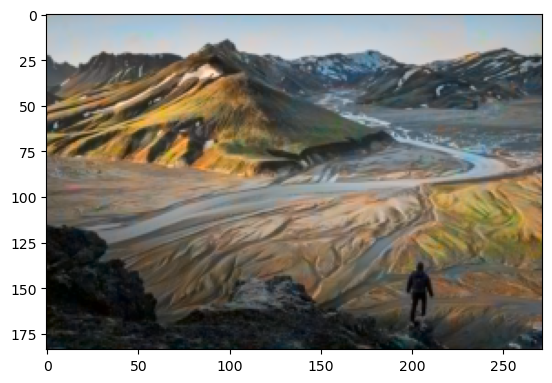

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


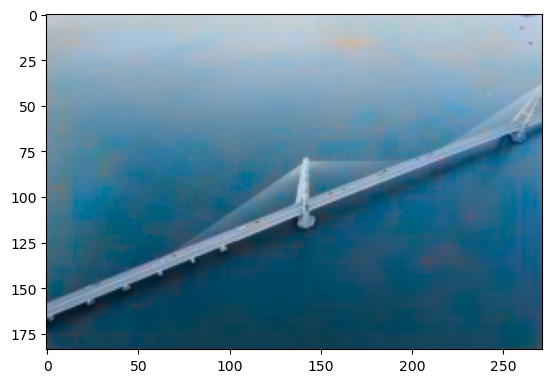

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


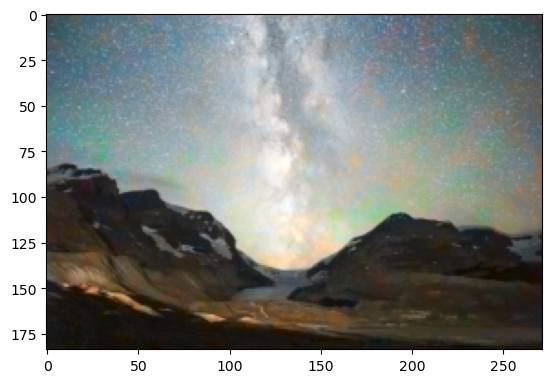

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


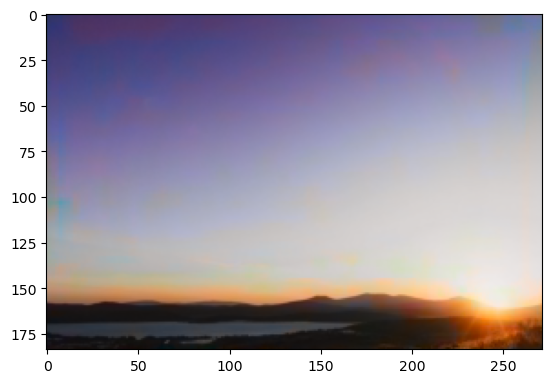

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


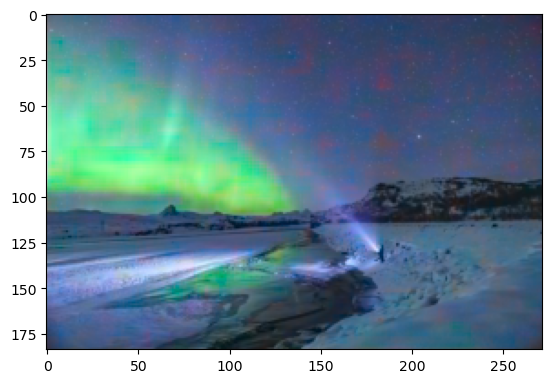

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


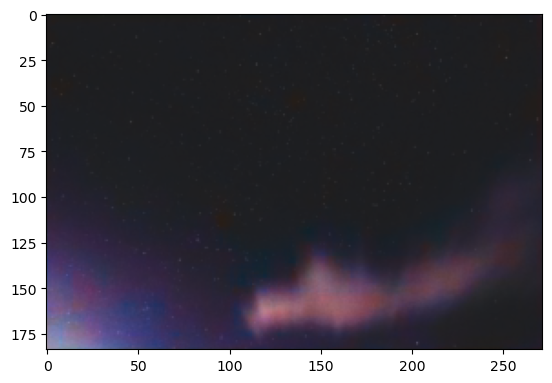

C:\Users\15738\AppData\Roaming\Python\Python310\site-packages\skimage\_shared\utils.py:394: UserWarning: Color data out of range: Z < 0 in 18 pixels
  return func(*args, **kwargs)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


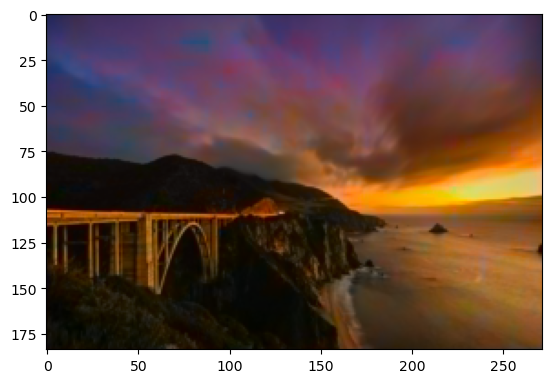

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


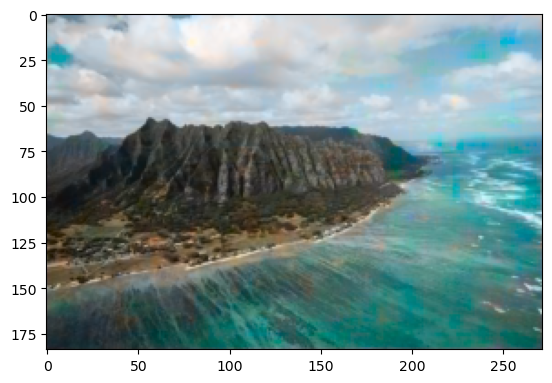

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


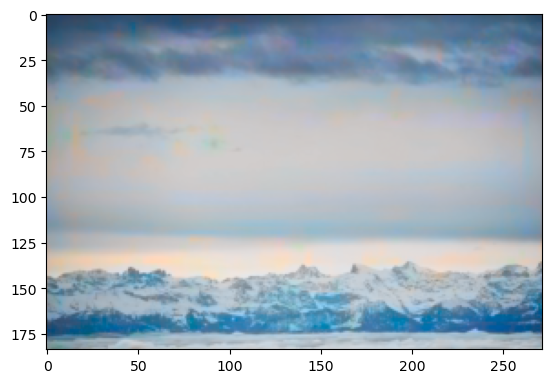

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


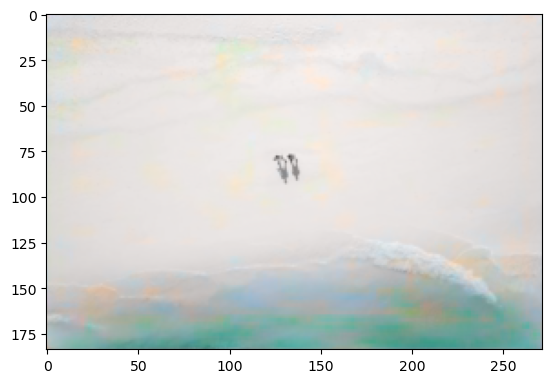

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


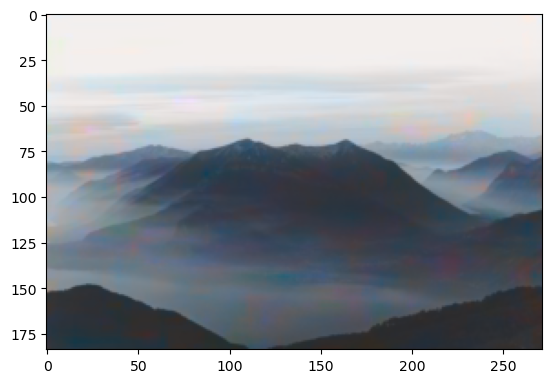

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


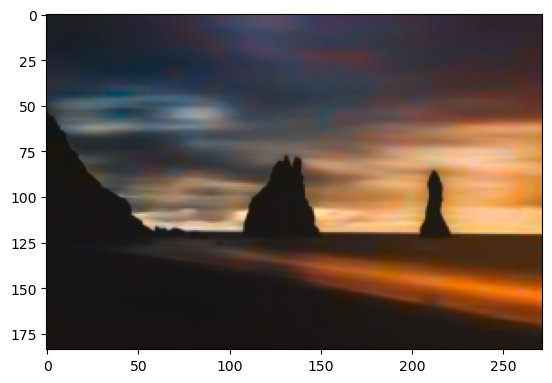

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


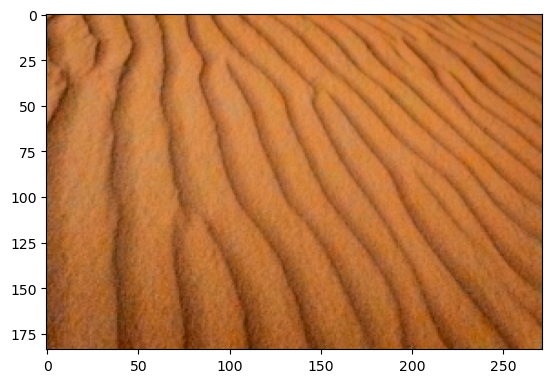

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


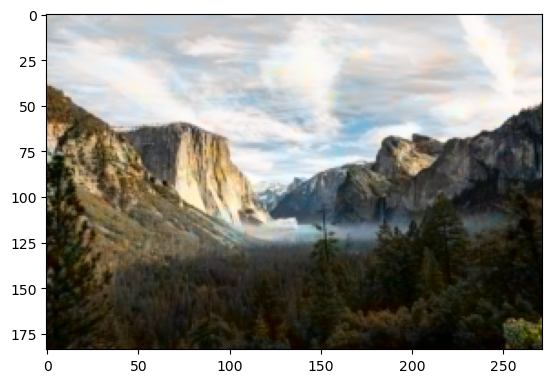

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


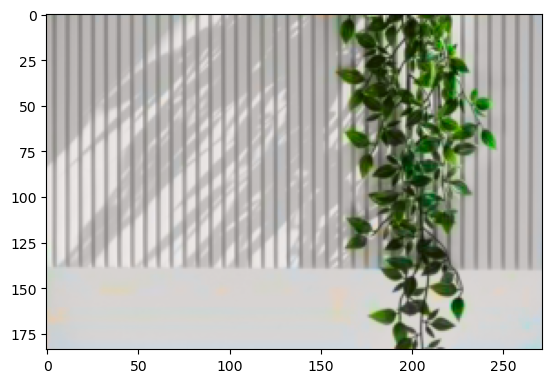

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


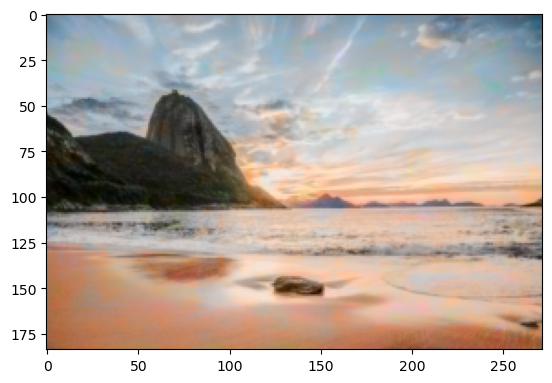

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


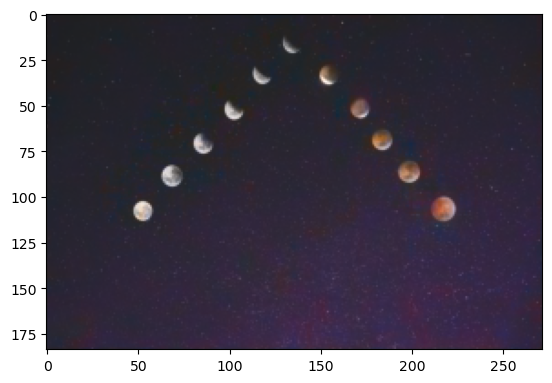

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


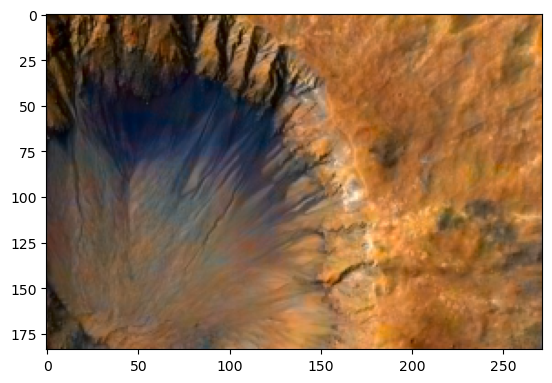

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


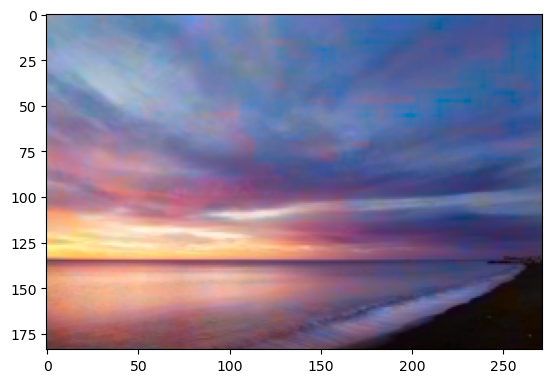

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


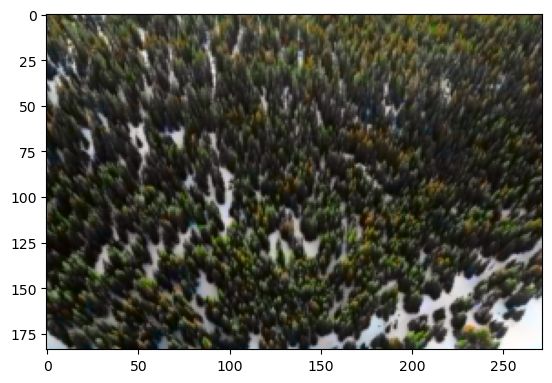

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


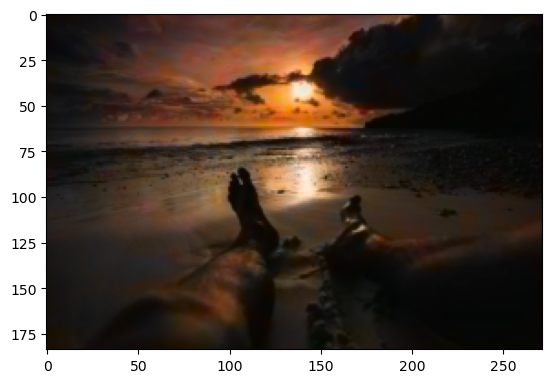

In [9]:
train()
colorize()